# Chapter 4. 연습문제 정답

세상에서 가장 유명한 iris(붓꽃)라는 교육용 데이터 셋이 있습니다. 앞에서 배웠던 병아리 예제를 바탕으로 iris 데이터 셋을 이용해 기초 통계량과 다양한 그래프를 그려 보기를 바랍니다. 참고로 iris 데이터 셋은 seaborn 패키지에서 데이터 프레임 형태로 가져올 수 있으며 상세한 코드는 chapter 3의 “2. pandas의 데이터 프레임” 부분을 참고하기 바랍니다.

#### 1. iris 데이터 셋의 구조(structure)와 변수의 자료형(type)을 pandas 메서드를 이용해 확인해보세요. 몇 개의 열과 행으로 이뤄졌으며 각 열은 어떤 형태를 갖추고 있나요?

∴ 5개의 열(4개의 float와 1개의 int)과 150개의 행

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2. head() 메서드를 이용해 iris 데이터 셋의 처음부터 10행까지 데이터를 불러와보세요.

In [2]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 3. sepal_width(꽃받침 너비) 열의 데이터 평균과 표준편차 그리고 3사분위수를 구해보세요.

∴ 평균 : 3.057, 표준편차 : 0.436, 3사분위수 : 3.3

In [3]:
iris.sepal_width.mean(), iris.sepal_width.std(), iris.sepal_width.quantile(0.75)

(3.057333333333334, 0.435866284936698, 3.3)

#### 4. sepal_width 열의 데이터 분포를 히스토그램으로 나타내 보세요.

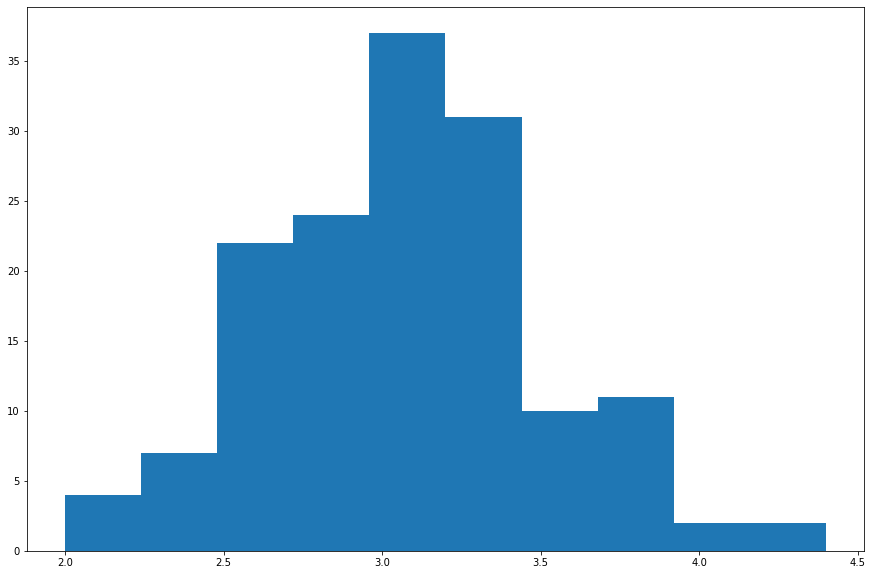

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.hist(iris.sepal_width)
plt.show()

#### 5. 상자그림을 이용해 붓꽃 품종별(species) sepal_width의 분포를 나타내 보세요. 그리고 sepal_width가 가장 넓은 품종은 어떤 종인가요?

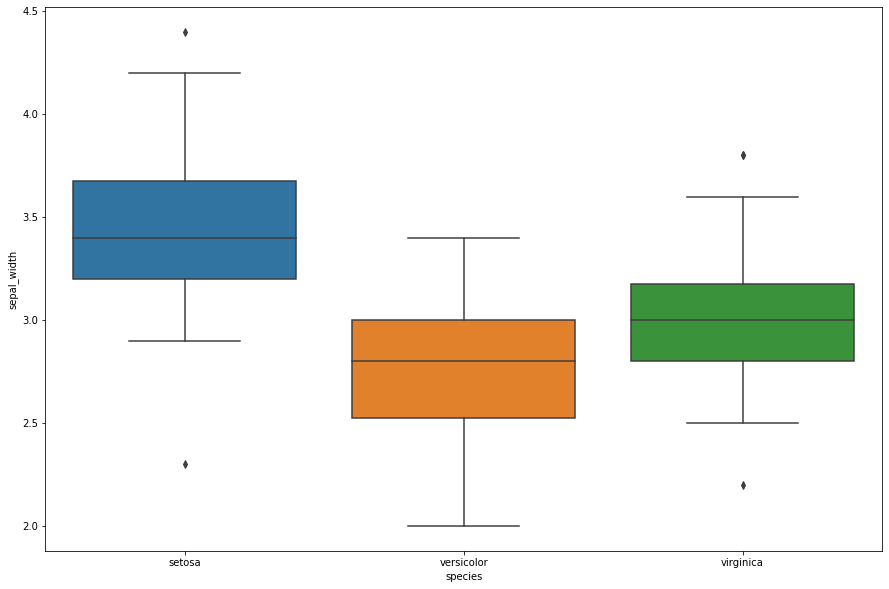

In [5]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(y = 'sepal_width', x = 'species', data = iris)
plt.show()

#### 6. setosa 품종의 sepal_width만 필터링해 s라는 데이터 셋을 만들고, versicolor 품종의 sepal_width만 필터링해 v라는 데이터 셋을 만들어보세요.
(힌트) loc 속성을 이용해 데이터를 필터링할 수 있습니다.

In [6]:
s = iris.loc[iris.species == 'setosa', ['sepal_width']]
v = iris.loc[iris.species == 'versicolor', ['sepal_width']]

#### 7. 데이터 셋 s와 v가 정규 분포를 따르는지 검정해보세요.

∴ 95% 신뢰수준에서 두 집단 모두 정규분포함

In [7]:
import scipy as sp
print(sp.stats.shapiro(s))
print(sp.stats.shapiro(v))

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)


→ p값이 둘다 0.05보다 크기 때문에 귀무가설 채택(정규분포함)

#### 8. 데이터 셋 s와 v의 평균이 같다고 볼 수 있는지 t-test를 통해 검정해보세요.

∴ 95% 신뢰수준에서 두 집단의 평균은 서로 같지 않음

In [8]:
sp.stats.ttest_ind(s, v)

Ttest_indResult(statistic=array([9.45497585]), pvalue=array([1.84525995e-15]))

→ p값이 0.05보다 작기 때문에 95% 신뢰수준에서 대립가설 채택, 즉 두 집단 간 평균은 서로 다르다고 판단됨